In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/archive.zip")

In [ ]:
df.head(2)

,Unnamed: 0,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,0,948,2,48,89.8128,0,0,0,100,0,...,0,1,0,1,0,422,477,566,324,0
1,1,1002,3,61,49.4424,0,0,0,90,0,...,1,3,0,1,0,162,218,392,564,1


In [ ]:
df.shape

(2139, 25)

In [ ]:
df.columns

Index(['Unnamed: 0', 'time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs',
       'karnof', 'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender',
       'str2', 'strat', 'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80',
       'cd820', 'cid'],
      dtype='object')

In [ ]:
df['time'].value_counts()

,count
time,
1087,34
1088,24
1154,18
1089,16
1091,16
...,...
717,1
696,1
596,1


In [ ]:
df['offtrt'].value_counts()

,count
offtrt,
0,1363
1,776


In [ ]:
#Here our target column is offtrt
#-->0 means Died
#-->1 means discontinued the treatment or censored

#PREPROCESSING

In [ ]:
#Checking the null values
df.isnull().sum()

,0
Unnamed: 0,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0


In [ ]:
df.describe()

,Unnamed: 0,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
count,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,...,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000,2139.000000
mean,1069.000000,879.098177,1.520804,35.248247,75.125311,0.084151,0.661057,0.131370,95.446470,0.021973,...,0.585788,1.979897,0.172978,0.751286,0.362786,350.501169,371.307153,986.627396,935.369799,0.243572
std,617.620434,292.274324,1.127890,8.709026,13.263164,0.277680,0.473461,0.337883,5.900985,0.146629,...,0.492701,0.899053,0.378317,0.432369,0.480916,118.573863,144.634909,480.197750,444.976051,0.429338
min,0.000000,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,49.000000,40.000000,124.000000,0.000000
25%,534.500000,727.000000,1.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,263.500000,269.000000,654.000000,631.500000,0.000000
50%,1069.000000,997.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,353.000000,893.000000,865.000000,0.000000
75%,1603.500000,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,460.000000,1207.000000,1146.500000,0.000000
max,2138.000000,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.000000,6035.000000,1.000000


#CLEANING THE DATA

In [ ]:
#Drop the unnecessary columns
df.drop(['Unnamed: 0','cid'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820'],
      dtype='object')

In [ ]:
df.shape

(2139, 23)

In [ ]:
df['drugs'].value_counts()

,count
drugs,
0,1858
1,281


#splitting the data


In [ ]:
x=df.drop('offtrt',axis=1)
y=df['offtrt']

In [ ]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

#Standardise the feature values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#Model Buildng

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#PREDICTION
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test)[:,1]


Accuracy: 73.83%
Confusion Matrix:
 [[243  30]
 [ 82  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       273
           1       0.71      0.47      0.57       155

    accuracy                           0.74       428
   macro avg       0.73      0.68      0.69       428
weighted avg       0.73      0.74      0.72       428

ROC-AUC Score: 0.78


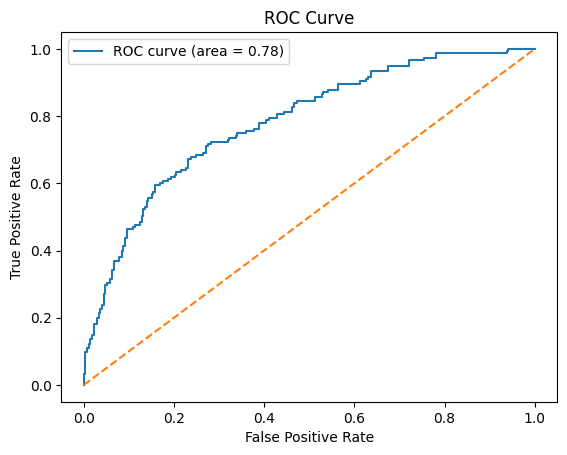

In [ ]:
#Step 4: Evaluate the Model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()